## CuriosiDados 2 - Qual o estado com a maior razão rebanho bovino/pessoa?

In [1]:
# Importando bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geobr

In [2]:
# Lendo arquivos
pop = pd.read_csv('pop.csv')
reb = pd.read_csv('rebanhos.csv')

In [3]:
pop.head()

,ano,sigla_uf,id_municipio,populacao
0,2017,RO,1100015,25437
1,2017,RO,1100023,107345
2,2017,RO,1100031,6224
3,2017,RO,1100049,88507
4,2017,RO,1100056,17934


In [4]:
pop.shape

(5570, 4)

In [5]:
reb.head()

,sigla_uf,id_municipio,quantidade_bovinos_total
0,RO,1100015,319811
1,RO,1100023,317996
2,RO,1100031,113277
3,RO,1100049,312990
4,RO,1100056,109292


In [6]:
reb.shape

(5563, 3)

### Razão Nacional

- Somar o efetivo de rebanho no país inteiro e dividir pela população.

In [7]:
# Bovinos
efe_reb = reb['quantidade_bovinos_total'].sum()

# População
pop_total = pop['populacao'].sum()

# Razão
razao_nacional = efe_reb / pop_total
print(razao_nacional)

0.8255359100314917


### Razão Estadual
    1. Manipulação;
        1.1. Juntar dataframes;
        1.2. Remover colunas irrelevantes;
        1.3. Preencher dados faltantes;
        1.4. Agrupar por estado;
        1.5. Criar nova coluna com a razão de cada estado
        
    2. Visualização
        2.1. Coletar dados geográficos;
        2.2. Alterar colunas necessárias;
        2.3. Juntar os dataframes (informações geográficas e quantitativas);
        2.4. Plotar.

## Manipulação

### 1.1 `pd.merge()`

In [8]:
# pd.merge():
df = pd.merge(pop, reb, on = 'id_municipio', how = 'outer')

In [9]:
# df.head()
df.head()

,ano,sigla_uf_x,id_municipio,populacao,sigla_uf_y,quantidade_bovinos_total
0,2017,RO,1100015,25437,RO,319811.0
1,2017,RO,1100023,107345,RO,317996.0
2,2017,RO,1100031,6224,RO,113277.0
3,2017,RO,1100049,88507,RO,312990.0
4,2017,RO,1100056,17934,RO,109292.0


In [10]:
# df.info()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5570 entries, 0 to 5569
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ano                       5570 non-null   int64  
 1   sigla_uf_x                5570 non-null   object 
 2   id_municipio              5570 non-null   int64  
 3   populacao                 5570 non-null   int64  
 4   sigla_uf_y                5563 non-null   object 
 5   quantidade_bovinos_total  5563 non-null   float64
dtypes: float64(1), int64(3), object(2)
memory usage: 304.6+ KB


### 1.2 Remover colunas desnecessárias

In [11]:
# Dropando colunas desnecessárias (.drop())
df.drop('sigla_uf_y', axis = 1, inplace = True)

### 1.3 Preencher valores faltantes

In [12]:
# .fillna() (assumir quantidade de bovinos = 0)
df['quantidade_bovinos_total'] = df['quantidade_bovinos_total'].fillna(0)

In [13]:
# df.info()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5570 entries, 0 to 5569
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ano                       5570 non-null   int64  
 1   sigla_uf_x                5570 non-null   object 
 2   id_municipio              5570 non-null   int64  
 3   populacao                 5570 non-null   int64  
 4   quantidade_bovinos_total  5570 non-null   float64
dtypes: float64(1), int64(3), object(1)
memory usage: 261.1+ KB


### 1.4 `.groupby()`

In [14]:
# .groupby()
df_agrupado = df.groupby('sigla_uf_x')[['populacao', 'quantidade_bovinos_total']].sum()

In [15]:
# Tranformando índice em coluna e renomeando
# .reset_index()
df_agrupado = df_agrupado.reset_index()

# .rename()
df_agrupado = df_agrupado.rename(columns = {'sigla_uf_x':'sigla_uf'})

In [16]:
df_agrupado.head()

,sigla_uf,populacao,quantidade_bovinos_total
0,AC,829619,2139795.0
1,AL,3375823,774153.0
2,AM,4063614,1252817.0
3,AP,797722,36481.0
4,BA,15344447,8168367.0


### 1.5 Criar coluna com razão estadual

In [17]:
df_agrupado['razao'] = df_agrupado['quantidade_bovinos_total'] / df_agrupado['populacao']

In [18]:
df_agrupado

,sigla_uf,populacao,quantidade_bovinos_total,razao
0,AC,829619,2139795.0,2.579250
1,AL,3375823,774153.0,0.229323
2,AM,4063614,1252817.0,0.308301
3,AP,797722,36481.0,0.045731
4,BA,15344447,8168367.0,0.532334
5,CE,9020460,1892771.0,0.209831
6,DF,3039444,62910.0,0.020698
7,ES,4016356,1650374.0,0.410913
8,GO,6778772,16651424.0,2.456407
9,MA,7000229,5418392.0,0.774031


## 2. Visualização

### 2.1 Coletar dados geográficos

In [19]:
geom = geobr.read_state()

In [20]:
geom

,code_state,abbrev_state,name_state,code_region,name_region,geometry
0,11.0,RO,Rondônia,1.0,Norte,"MULTIPOLYGON (((-63.32721 -7.97672, -62.86662 ..."
1,12.0,AC,Acre,1.0,Norte,"MULTIPOLYGON (((-73.18253 -7.33550, -72.58477 ..."
2,13.0,AM,Amazonas,1.0,Norte,"MULTIPOLYGON (((-67.32609 2.02971, -67.31682 2..."
3,14.0,RR,Roraima,1.0,Norte,"MULTIPOLYGON (((-60.20051 5.26434, -60.19273 5..."
4,15.0,PA,Pará,1.0,Norte,"MULTIPOLYGON (((-54.95431 2.58369, -54.93542 2..."
5,16.0,AP,Amapá,1.0,Norte,"MULTIPOLYGON (((-51.17970 4.00008, -51.17739 3..."
6,17.0,TO,Tocantins,1.0,Norte,"MULTIPOLYGON (((-48.35878 -5.17008, -48.33846 ..."
7,21.0,MA,Maranhão,2.0,Nordeste,"MULTIPOLYGON (((-45.84073 -1.04548, -45.84099 ..."
8,22.0,PI,Piauí,2.0,Nordeste,"MULTIPOLYGON (((-41.74605 -2.80350, -41.73488 ..."
9,23.0,CE,Ceará,2.0,Nordeste,"MULTIPOLYGON (((-41.16703 -4.46736, -41.17757 ..."


### 2.2 Alterar/dropar colunas necessárias

In [21]:
# Compatibilizando nome das colunas para o merge
geom = geom.rename(columns = {'abbrev_state':'sigla_uf'})

# Dropando colunas
drop = ['code_state', 'name_state', 'code_region', 'name_region']
geom.drop(drop, axis = 1, inplace = True)

In [22]:
geom

,sigla_uf,geometry
0,RO,"MULTIPOLYGON (((-63.32721 -7.97672, -62.86662 ..."
1,AC,"MULTIPOLYGON (((-73.18253 -7.33550, -72.58477 ..."
2,AM,"MULTIPOLYGON (((-67.32609 2.02971, -67.31682 2..."
3,RR,"MULTIPOLYGON (((-60.20051 5.26434, -60.19273 5..."
4,PA,"MULTIPOLYGON (((-54.95431 2.58369, -54.93542 2..."
5,AP,"MULTIPOLYGON (((-51.17970 4.00008, -51.17739 3..."
6,TO,"MULTIPOLYGON (((-48.35878 -5.17008, -48.33846 ..."
7,MA,"MULTIPOLYGON (((-45.84073 -1.04548, -45.84099 ..."
8,PI,"MULTIPOLYGON (((-41.74605 -2.80350, -41.73488 ..."
9,CE,"MULTIPOLYGON (((-41.16703 -4.46736, -41.17757 ..."


### 2.3 Juntar os dataframes (informações geográficas e quantitativas)

In [23]:
plot_df = pd.merge(geom, df_agrupado[['sigla_uf', 'razao']], on = 'sigla_uf')

In [24]:
plot_df

,sigla_uf,geometry,razao
0,RO,"MULTIPOLYGON (((-63.32721 -7.97672, -62.86662 ...",5.441955
1,AC,"MULTIPOLYGON (((-73.18253 -7.33550, -72.58477 ...",2.579250
2,AM,"MULTIPOLYGON (((-67.32609 2.02971, -67.31682 2...",0.308301
3,RR,"MULTIPOLYGON (((-60.20051 5.26434, -60.19273 5...",1.303127
4,PA,"MULTIPOLYGON (((-54.95431 2.58369, -54.93542 2...",1.713091
5,AP,"MULTIPOLYGON (((-51.17970 4.00008, -51.17739 3...",0.045731
6,TO,"MULTIPOLYGON (((-48.35878 -5.17008, -48.33846 ...",4.089763
7,MA,"MULTIPOLYGON (((-45.84073 -1.04548, -45.84099 ...",0.774031
8,PI,"MULTIPOLYGON (((-41.74605 -2.80350, -41.73488 ...",0.433594
9,CE,"MULTIPOLYGON (((-41.16703 -4.46736, -41.17757 ...",0.209831


### 2.4. Coluna qualitativa

### 2.4 Plotar

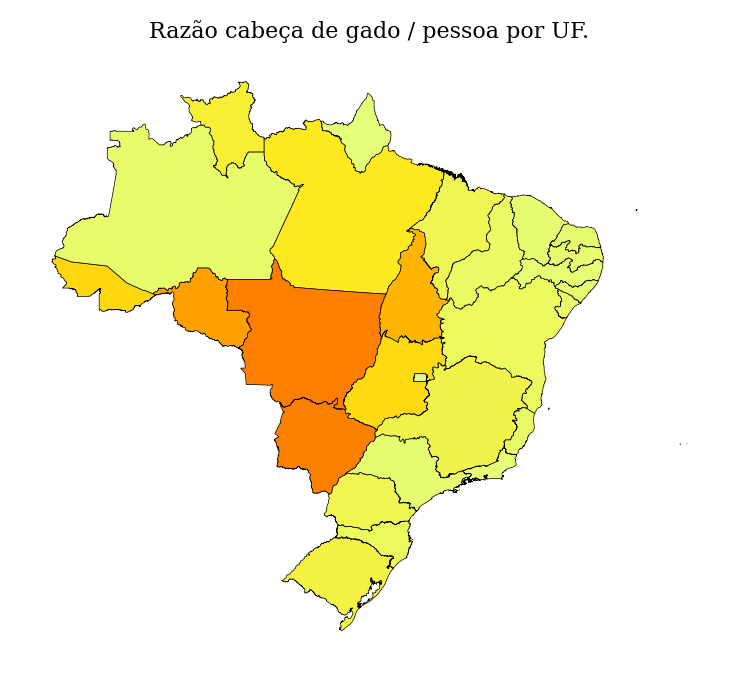

In [52]:
# configurando fontes do mapa
plt.rcParams['font.family'] = 'serif'

# Figura e Axes
fig, ax = plt.subplots(figsize=(5, 4), dpi=200)

# plotando
plot_df.plot(column = 'razao',
             cmap = 'Wistia',
             lw = .25,
             ec = 'k',
             ax = ax)

# desativando eixos
ax.set_axis_off()

# título
ax.set_title('Razão cabeça de gado / pessoa por UF.', fontsize = 8)



plt.show()